# Spaceship Titanic

In [1]:
import pandas as pd
import numpy as np

#warnings
import warnings
warnings.filterwarnings('ignore')

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#data 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold

## Getting Data Ready

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Exploratory Data Analysis

### Univariate Analysis

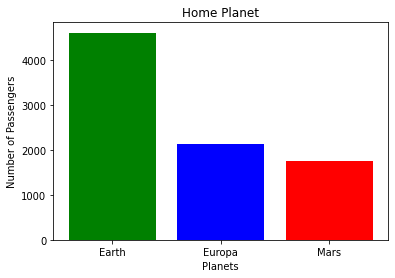

In [6]:
HomePlanetCount = train.HomePlanet.value_counts()
plt.bar(HomePlanetCount.index, HomePlanetCount.values, color=['Green', 'Blue', 'Red'])
plt.title("Home Planet")
plt.ylabel('Number of Passengers')
plt.xlabel('Planets')
plt.show()

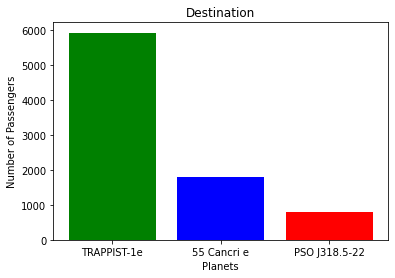

In [7]:
DestinationCount = train.Destination.value_counts()
plt.bar(DestinationCount.index, DestinationCount.values, color=['Green', 'Blue', 'Red'])
plt.title("Destination")
plt.ylabel('Number of Passengers')
plt.xlabel('Planets')
plt.show()

In [8]:
print('Percentage of passengers at Home planets\n')
for i in range(len(HomePlanetCount)):
    print(str(HomePlanetCount.index[i]) + "\t:\t" + str(HomePlanetCount.values[i]/HomePlanetCount.values.sum() * 100) + ' % ')

Percentage of passengers at Home planets

Earth	:	54.1921808761187 % 
Europa	:	25.09420631182289 % 
Mars	:	20.713612812058408 % 


In [9]:
print('Percentage of passengers at Destination planets\n')
for i in range(len(DestinationCount)):
    print(str(DestinationCount.index[i]) + "\t:\t" + str(DestinationCount.values[i]/DestinationCount.values.sum() * 100) + ' % ')

Percentage of passengers at Destination planets

TRAPPIST-1e	:	69.49829632240629 % 
55 Cancri e	:	21.149101163200566 % 
PSO J318.5-22	:	9.352602514393137 % 


We observe that the maximum number of passengers start their journey from **Earth(~54%)** and are travelling to **TRAPPIST-1e(~70%)**.

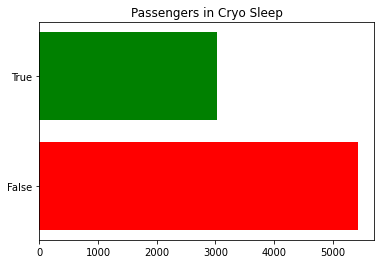

In [10]:
CryoSleepCount = train.CryoSleep.value_counts()
plt.barh(CryoSleepCount.index, CryoSleepCount.values, color=['Red', 'Green'])
plt.title('Passengers in Cryo Sleep')
plt.yticks(ticks=[0.00,1.00], labels=['False', 'True'])
plt.show()

In [11]:
for i in range(len(CryoSleepCount)):
    print(str(CryoSleepCount.index[i]) + "\t:\t" + str(CryoSleepCount.values[i]/CryoSleepCount.values.sum()*100) + " % ")

False	:	64.1694195375177 % 
True	:	35.8305804624823 % 


We observe that the **majority(~64%)** of passengers are travelling without cryo sleep.

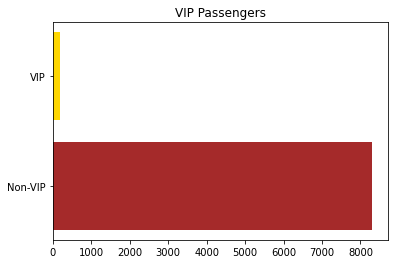

In [12]:
VIPCount = train.VIP.value_counts()
plt.barh(VIPCount.index, VIPCount.values, color=['Brown', 'Gold'])
plt.yticks(ticks=[0.00,1.00], labels=['Non-VIP', 'VIP'])
plt.title('VIP Passengers')
plt.show()

In [13]:
VIPCount.index = ['Non-VIP', 'VIP']
for i in range(len(VIPCount)):
    print(str(VIPCount.index[i]) + "\t:\t" + str(VIPCount.values[i]/VIPCount.values.sum()*100) + " % ")

Non-VIP	:	97.65606595995288 % 
VIP	:	2.343934040047114 % 


Around **~98%** of the passengers are **not VIP**.

In [14]:
train.Age.describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

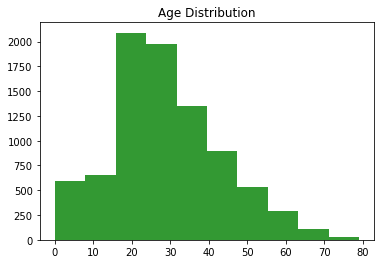

In [15]:
plt.hist(train.Age, bins=10, stacked=True, alpha=0.8, color='g')
plt.title("Age Distribution")
plt.show()

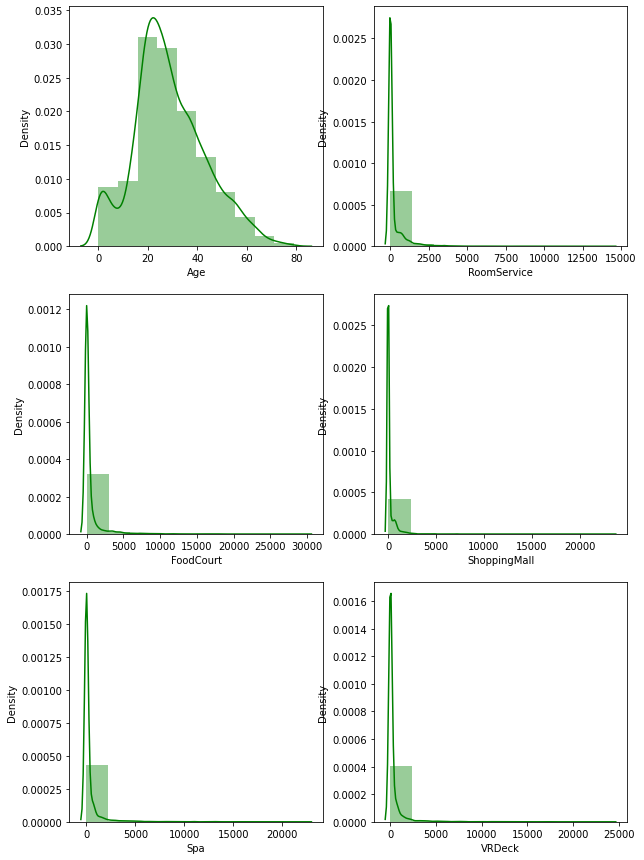

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
sns.distplot(train.Age, bins=10, color='g', ax=ax[0][0])
sns.distplot(train.RoomService, bins=10, color='g', ax=ax[0][1])
sns.distplot(train.FoodCourt, bins=10, color='g', ax=ax[1][0])
sns.distplot(train.ShoppingMall, bins=10, color='g', ax=ax[1][1])
sns.distplot(train.Spa, bins=10, color='g', ax=ax[2][0])
sns.distplot(train.VRDeck, bins=10, color='g', ax=ax[2][1])

plt.show()

### Bivariate Analysis

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

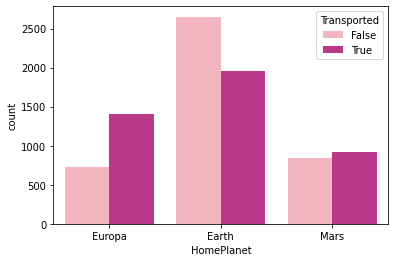

In [17]:
# HomePlanet vs Transported
sns.countplot(x=train.HomePlanet, hue=train.Transported, palette="RdPu")

In [18]:
def targetPlot(featureCols, targetCol, ax_row=1):
    """
    Plot the relation between the features and target
    """
    fig,ax = plt.subplots(ax_row, 2, figsize=(18, 25))
    
    for i in range(len(featureCols)):
        sns.countplot(x = train[featureCols[i]], hue=train.Transported, 
                     palette="RdPu", ax=ax[i][0])
        
        temp_df = train.groupby([featureCols[i]]).mean()
        temp_df.Transported
        
        sns.barplot(temp_df.index, temp_df.Transported, ax=ax[i][1],
                   palette='mako')

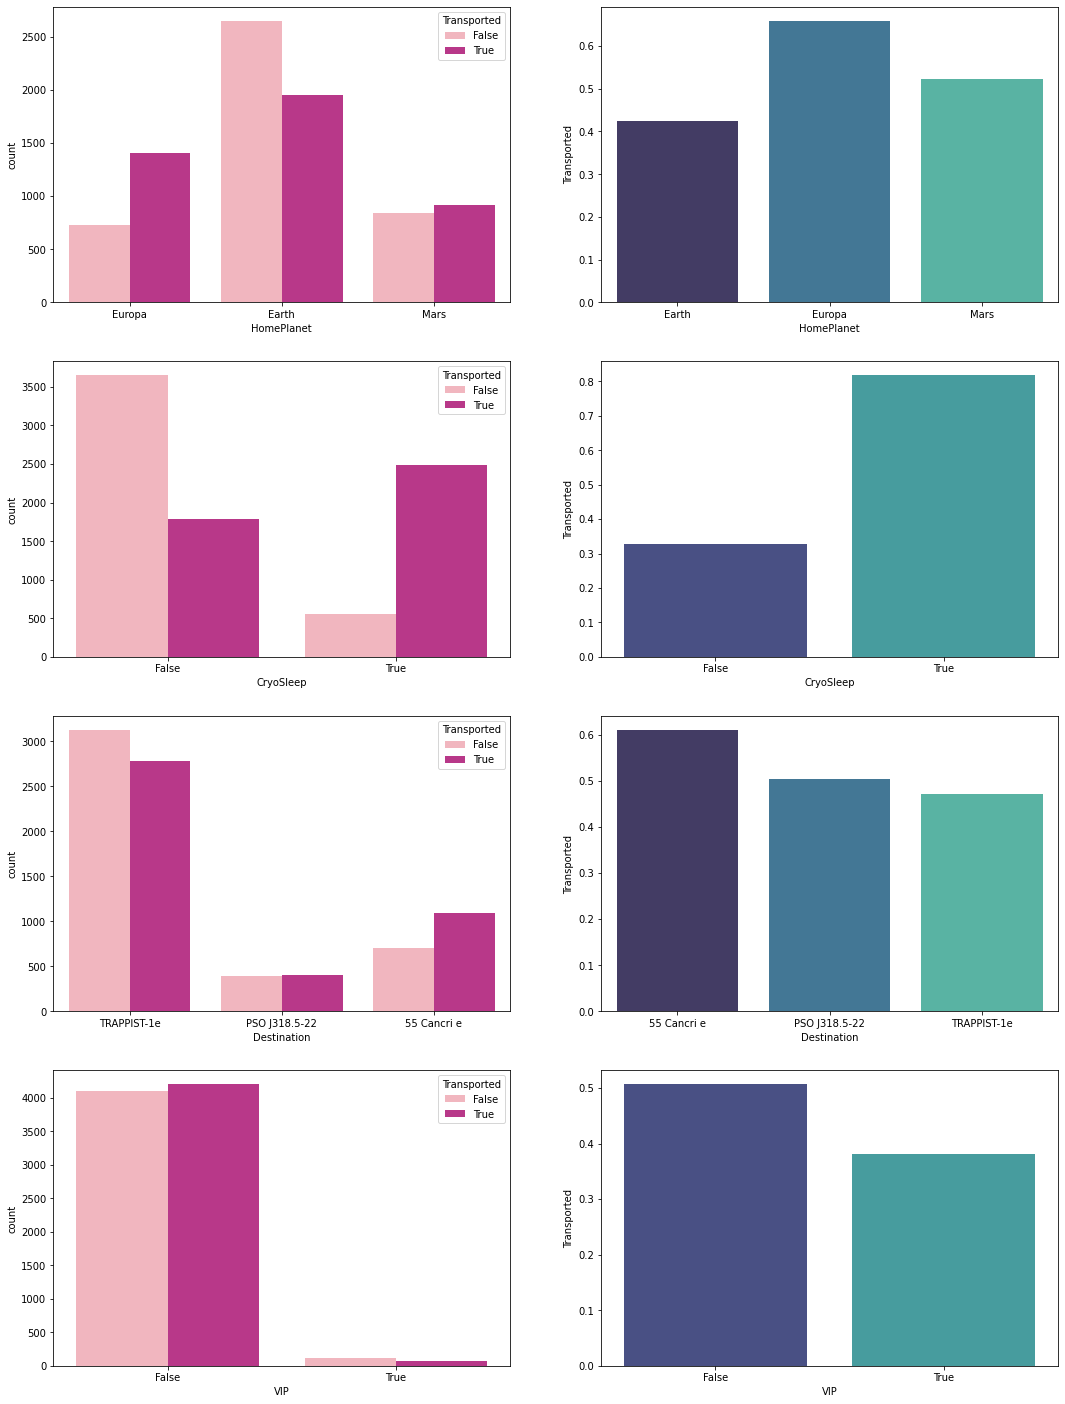

In [19]:
featureCols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
targetPlot(featureCols, train.Transported, len(featureCols))

## Handling Missing Values

In [323]:
train.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
GroupId         0
GroupNum        0
Berth           0
Room            0
Class           0
dtype: int64

In [324]:
train.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
GroupId           int64
GroupNum          int64
Berth            object
Room            float64
Class            object
dtype: object

In [3]:
pid = train.PassengerId.str.split('_')

group_id =  []
group_num = []
for i in range(len(train)):
    group_id.append(int(pid[i][0]))
    group_num.append(int(pid[i][1]))
    
print("Length Group id ", len(group_id))
print("Length Group num ", len(group_num))

train['GroupId'] = group_id
train['GroupNum'] = group_num
train.drop("PassengerId", axis=1, inplace=True)

Length Group id  8693
Length Group num  8693


In [4]:
cabin = train.Cabin.str.split('/')

berth   = []
room    = []
p_class = []

for i in range(len(train)):
    if str(train.Cabin[i]) == 'nan':
        berth.append(np.nan)
        p_class.append(np.nan)
        room.append(np.nan)
    else:
        berth.append(cabin[i][0])
        p_class.append(cabin[i][2])
        room.append(int(cabin[i][1]))
    
print(pd.unique(berth))
print(pd.unique(p_class))

train['Berth'] = berth
train['Room']  = room
train['Class'] = p_class

['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
['P' 'S' nan]


In [5]:
train.drop(['Cabin', 'Name'], axis=1, inplace=True)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupId,GroupNum,Berth,Room,Class
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,1,B,0.0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2,1,F,0.0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3,1,A,0.0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3,2,A,0.0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,4,1,F,1.0,S


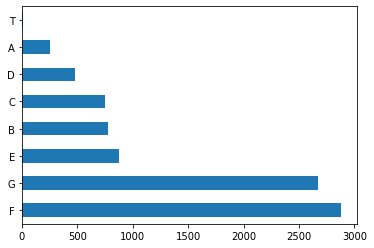

In [201]:
train.Berth.value_counts().plot(kind='barh');

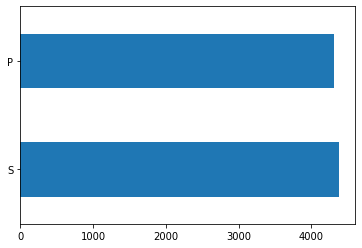

In [203]:
train.Class.value_counts().plot(kind='barh');

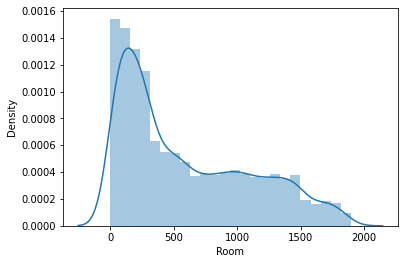

600


In [185]:
sns.distplot(train.Room)
plt.show()
print(int(train.Room.mean()))

In [6]:
def Impute(dataFrame, column, strategy, fill_value=None):
    imputer = SimpleImputer(strategy=strategy)
    imp_x = imputer.fit_transform([dataFrame[column]])
    
    dataFrame[column] = imp_x[0]
    return dataFrame.head()

In [7]:
#Categorical Values
Impute(train, 'HomePlanet', strategy='constant', fill_value='Earth')
Impute(train, 'VIP', strategy='constant', fill_value=False)
Impute(train, 'CryoSleep', strategy='constant', fill_value=False)
Impute(train, 'Destination', strategy='constant', fill_value='TRAPPIST-1e')

#Berth
random_selection = np.random.randint(0,2,train.Berth.isna().sum())
rand_berth = []
for i in range(len(random_selection)):
    if random_selection[i] == 0:
        rand_berth.append('F')
    else:
        rand_berth.append('G')
        
train.Berth[train.Berth.isna()] = rand_berth

#Class
random_selection = np.random.randint(0,2,train.Class.isna().sum())
rand_class = []
for i in range(len(random_selection)):
    if random_selection[i] == 0:
        rand_class.append('P')
    else:
        rand_class.append('S')
        
train.Class[train.Class.isna()] = rand_class

#Numerical Values
index = train.Age[train.Age.isna() == True].index
train.Age[index] = train.Age.mean()

index = train.RoomService[train.RoomService.isna() == True].index
train.RoomService[index] = train.RoomService.median()

index = train.FoodCourt[train.FoodCourt.isna() == True].index
train.FoodCourt[index] = train.FoodCourt.median()

index = train.ShoppingMall[train.ShoppingMall.isna() == True].index
train.ShoppingMall[index] = train.ShoppingMall.median()

index = train.Spa[train.Spa.isna() == True].index
train.Spa[index] = train.Spa.median()

index = train.VRDeck[train.VRDeck.isna() == True].index
train.VRDeck[index] = train.VRDeck.median()

index = train.Room[train.Room.isna() == True].index
train.Room[index] = int(train.Room.mean())

## Label Encoding

In [9]:
#Encode Data

#Home Planet
enc_HomePlanet = LabelEncoder()
encoded_HomePlanet = enc_HomePlanet.fit_transform(train.HomePlanet)
train.HomePlanet = encoded_HomePlanet

#Destination
enc_Destination = LabelEncoder()
encoded_Destination = enc_Destination.fit_transform(train.Destination)
train.Destination = encoded_Destination

#Berth
enc_Berth = LabelEncoder()
encoded_Berth = enc_Berth.fit_transform(train.Berth)
train.Berth = encoded_Berth

#Class
enc_Class = LabelEncoder()
encoded_Class = enc_Class.fit_transform(train.Class)
train.Class = encoded_Class

#CryoSleep
for i in range(len(train)):
    if train.CryoSleep[i] == 'missing_value':
        train.CryoSleep[i] = False

#VIP
for i in range(len(train)):
    if train.VIP[i] == 'missing_value':
        train.VIP[i] = False

for i in range(len(train)):
    train.CryoSleep[i] = int(train.CryoSleep[i])
    train.VIP[i] = int(train.VIP[i])

train.CryoSleep = np.int32(train.CryoSleep)
train.VIP = np.int32(train.VIP)

In [35]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupId,GroupNum,Berth,Room,Class
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,1,1,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,2,1,5,0.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,3,1,0,0.0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,3,2,0,0.0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,4,1,5,1.0,1


In [21]:
# saving the dataframe
train.to_csv('train_X.csv')

## Transforming Test Data

In [24]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [25]:
pid = test.PassengerId.str.split('_')

group_id =  []
group_num = []
for i in range(len(test)):
    group_id.append(int(pid[i][0]))
    group_num.append(int(pid[i][1]))
    
print("Length Group id ", len(group_id))
print("Length Group num ", len(group_num))

test['GroupId'] = group_id
test['GroupNum'] = group_num
test.drop("PassengerId", axis=1, inplace=True)

Length Group id  4277
Length Group num  4277


In [26]:
cabin = test.Cabin.str.split('/')

berth   = []
room    = []
p_class = []

for i in range(len(test)):
    if str(test.Cabin[i]) == 'nan':
        berth.append(np.nan)
        p_class.append(np.nan)
        room.append(np.nan)
    else:
        berth.append(cabin[i][0])
        p_class.append(cabin[i][2])
        room.append(int(cabin[i][1]))
    
print(pd.unique(berth))
print(pd.unique(p_class))

test['Berth'] = berth
test['Room']  = room
test['Class'] = p_class

['G' 'F' 'C' 'B' 'D' 'E' nan 'A' 'T']
['S' 'P' nan]


In [28]:
test.drop(['Cabin', 'Name'], axis=1, inplace=True)
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId,GroupNum,Berth,Room,Class
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,13,1,G,3.0,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,18,1,F,4.0,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,19,1,C,0.0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,21,1,C,1.0,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,23,1,F,5.0,S


In [29]:
#Categorical Values
Impute(test, 'HomePlanet', strategy='constant', fill_value='Earth')
Impute(test, 'VIP', strategy='constant', fill_value=False)
Impute(test, 'CryoSleep', strategy='constant', fill_value=False)
Impute(test, 'Destination', strategy='constant', fill_value='TRAPPIST-1e')

#Berth
random_selection = np.random.randint(0,2,test.Berth.isna().sum())
rand_berth = []
for i in range(len(random_selection)):
    if random_selection[i] == 0:
        rand_berth.append('F')
    else:
        rand_berth.append('G')
        
test.Berth[test.Berth.isna()] = rand_berth

#Class
random_selection = np.random.randint(0,2,test.Class.isna().sum())
rand_class = []
for i in range(len(random_selection)):
    if random_selection[i] == 0:
        rand_class.append('P')
    else:
        rand_class.append('S')
        
test.Class[test.Class.isna()] = rand_class

#Numerical Values
index = test.Age[test.Age.isna() == True].index
test.Age[index] = test.Age.mean()

index = test.RoomService[test.RoomService.isna() == True].index
test.RoomService[index] = test.RoomService.median()

index = test.FoodCourt[test.FoodCourt.isna() == True].index
test.FoodCourt[index] = test.FoodCourt.median()

index = test.ShoppingMall[test.ShoppingMall.isna() == True].index
test.ShoppingMall[index] = test.ShoppingMall.median()

index = test.Spa[test.Spa.isna() == True].index
test.Spa[index] = test.Spa.median()

index = test.VRDeck[test.VRDeck.isna() == True].index
test.VRDeck[index] = test.VRDeck.median()

index = test.Room[test.Room.isna() == True].index
test.Room[index] = int(test.Room.mean())

In [30]:
#Encode Data

#Home Planet
encoded_HomePlanet = enc_HomePlanet.transform(test.HomePlanet)
test.HomePlanet = encoded_HomePlanet

#Destination
encoded_Destination = enc_Destination.transform(test.Destination)
test.Destination = encoded_Destination

#Berth
encoded_Berth = enc_Berth.transform(test.Berth)
test.Berth = encoded_Berth

#Class
encoded_Class = enc_Class.transform(test.Class)
test.Class = encoded_Class

#CryoSleep
for i in range(len(test)):
    if test.CryoSleep[i] == 'missing_value':
        test.CryoSleep[i] = False

#VIP
for i in range(len(test)):
    if test.VIP[i] == 'missing_value':
        test.VIP[i] = False

for i in range(len(test)):
    test.CryoSleep[i] = int(test.CryoSleep[i])
    test.VIP[i] = int(test.VIP[i])

test.CryoSleep = np.int32(test.CryoSleep)
test.VIP = np.int32(test.VIP)

In [31]:
# saving the dataframe
test.to_csv('test_X.csv')

In [33]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId,GroupNum,Berth,Room,Class
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,13,1,6,3.0,1
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,18,1,5,4.0,1
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,19,1,2,0.0,1
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,21,1,2,1.0,1
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,23,1,5,5.0,1


## Model Selection

In [2]:
train = pd.read_csv('train_X.csv')
X = train.drop('Transported', axis=1)
y = train['Transported']

In [3]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [4]:
len(train_X), len(train_y), len(test_X), len(test_y)

(6954, 6954, 1739, 1739)

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    #SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

def train(train_X, train_y, test_X, test_y, classifiers):
    trained_models = {}
    scores = {}
    for i in range(len(classifiers)):
        clf = classifiers[i]
        clf.fit(train_X, train_y)
        trained_models[str(classifiers[i])] = clf
        scores[str(classifiers[i])] = clf.score(test_X, test_y)
        print(str(clf) + " : " + str(clf.score(test_X, test_y)))
        print(str(clf))
        
    return trained_models, scores

In [25]:
models, scores = train(train_X, train_y, test_X, test_y, classifiers)

KNeighborsClassifier(n_neighbors=3) : 0.7343300747556066
KNeighborsClassifier(n_neighbors=3)
SVC(C=1, gamma=2) : 0.5020126509488212
SVC(C=1, gamma=2)
DecisionTreeClassifier(max_depth=10) : 0.7613571017826337
DecisionTreeClassifier(max_depth=10)
RandomForestClassifier(max_depth=10, max_features=1, n_estimators=10) : 0.7630822311673375
RandomForestClassifier(max_depth=10, max_features=1, n_estimators=10)
MLPClassifier(alpha=1, max_iter=1000) : 0.6768257619321449
MLPClassifier(alpha=1, max_iter=1000)
AdaBoostClassifier() : 0.7843588269120184
AdaBoostClassifier()
GaussianNB() : 0.718803910293272
GaussianNB()
QuadraticDiscriminantAnalysis() : 0.7274295572167913
QuadraticDiscriminantAnalysis()


## Hyperparameter tuning

In [29]:
classifier = AdaBoostClassifier()
distributions = {
    'n_estimators' : np.arange(1,100,10),
    'learning_rate' : np.arange(0,5,0.1)
}
clf = RandomizedSearchCV(classifier, distributions, random_state=0)
search = clf.fit(train_X, train_y)
search.best_params_

{'n_estimators': 91, 'learning_rate': 1.5}

In [31]:
classifier = AdaBoostClassifier(n_estimators=91, learning_rate=1.5)
classifier.fit(train_X, train_y)
classifier.score(test_X, test_y)

0.78205865439908

In [33]:
classifier = RandomForestClassifier()
distributions = {
    'n_estimators' : np.arange(1,1000,10),
    'criterion' : ['gini', 'entropy'],
    'max_depth' : np.arange(0,20,1),
}
clf = RandomizedSearchCV(classifier, distributions, random_state=0)
search = clf.fit(train_X, train_y)
search.best_params_

{'n_estimators': 311, 'max_depth': 14, 'criterion': 'entropy'}

In [66]:
classifier = RandomForestClassifier(n_estimators=311, max_depth=14, criterion='entropy')
classifier.fit(train_X, train_y)
classifier.score(test_X, test_y)

0.7872340425531915

#### Selected Classifier : RandomForestClassifier(n_estimators=311, max_depth=14, criterion='entropy')

## Test Data

In [49]:
test = pd.read_csv('test_X.csv')
test.drop('Unnamed: 0', axis=1, inplace=True)
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId,GroupNum,Berth,Room,Class
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,13,1,6,3.0,1
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,18,1,5,4.0,1
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,19,1,2,0.0,1
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,21,1,2,1.0,1
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,23,1,5,5.0,1


In [67]:
y_preds = classifier.predict(test)
y_preds

array([ True, False,  True, ...,  True,  True, False])

In [53]:
sample = pd.read_csv('sample_submission.csv')
sample

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [56]:
test_original = pd.read_csv('test.csv')
PassengerId = test_original.PassengerId

In [68]:
data = {
    "PassengerId" : PassengerId,
    "Transported" : y_preds
}

submission = pd.DataFrame(data=data)
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [73]:
submission.to_csv("submission.csv", index=False)

In [65]:
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId,GroupNum,Berth,Room,Class
0,0,1,2,27.000000,0,0.0,0.0,0.0,0.0,0.0,13,1,6,3.0,1
1,0,0,2,19.000000,0,0.0,9.0,0.0,2823.0,0.0,18,1,5,4.0,1
2,1,1,0,31.000000,0,0.0,0.0,0.0,0.0,0.0,19,1,2,0.0,1
3,1,0,2,38.000000,0,0.0,6652.0,0.0,181.0,585.0,21,1,2,1.0,1
4,0,0,2,20.000000,0,10.0,0.0,635.0,0.0,0.0,23,1,5,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.000000,0,0.0,0.0,0.0,0.0,0.0,9266,2,6,1496.0,1
4273,0,0,2,42.000000,0,0.0,847.0,17.0,10.0,144.0,9269,1,6,610.0,1
4274,2,1,0,28.658146,0,0.0,0.0,0.0,0.0,0.0,9271,1,3,296.0,0
4275,1,0,3,28.658146,0,0.0,2680.0,0.0,0.0,523.0,9273,1,3,297.0,0
